# Linear Regression With Numeric Data

This notebook will use the Boston Housing Dataset to go over how to do linear regression with numerical features.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

###  Boston housing Data Set 
#### Source: https://www.kaggle.com/c/boston-housing

crim - 
per capita crime rate by town.

zn - 
proportion of residential land zoned for lots over 25,000 sq.ft.

indus - 
proportion of non-retail business acres per town.

chas - 
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

nox - 
nitrogen oxides concentration (parts per 10 million).

rm - 
average number of rooms per dwelling.

age - 
proportion of owner-occupied units built prior to 1940.

dis - 
weighted mean of distances to five Boston employment centres.

rad - 
index of accessibility to radial highways.

tax - 
full-value property-tax rate per \$10,000.

ptratio - 
pupil-teacher ratio by town.

lstat - 
lower status of the population (percent).

medv - 
median value of owner-occupied homes in \$1000s.

In [2]:
data = pd.read_csv('datasets/boston_data.csv', index_col=0)

In [3]:
data.head()

,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
ID,,,,,,,,,,,
1,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
4,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
7,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9


In [4]:
data.shape

(333, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 1 to 506
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   indus    333 non-null    float64
 1   chas     333 non-null    int64  
 2   nox      333 non-null    float64
 3   rm       333 non-null    float64
 4   age      333 non-null    float64
 5   dis      333 non-null    float64
 6   rad      333 non-null    int64  
 7   tax      333 non-null    int64  
 8   ptratio  333 non-null    float64
 9   lstat    333 non-null    float64
 10  medv     333 non-null    float64
dtypes: float64(8), int64(3)
memory usage: 31.2 KB


### Describing data

In [6]:
data.describe()

,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,12.515435,22.768769
std,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,7.067781,9.173468
min,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,1.730000,5.000000
25%,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,7.180000,17.400000
50%,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,10.970000,21.600000
75%,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,16.420000,25.000000
max,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,37.970000,50.000000


Text(10.049999999999997, 0.5, 'median value of owner-occupied homes in $1000s.')

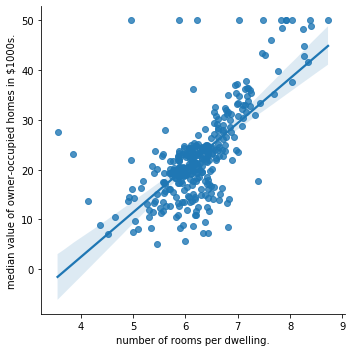

In [7]:
sns.lmplot('rm', 'medv', data)

plt.xlabel("number of rooms per dwelling.")
plt.ylabel("median value of owner-occupied homes in $1000s.")

Text(10.049999999999997, 0.5, 'median value of owner-occupied homes in $1000s')

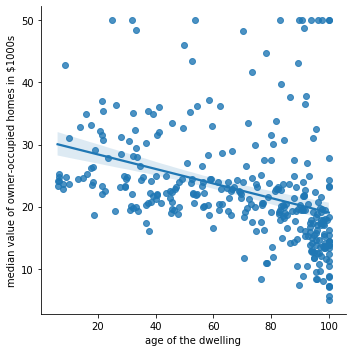

In [8]:
sns.lmplot('age', 'medv', data)

plt.xlabel("age of the dwelling")
plt.ylabel("median value of owner-occupied homes in $1000s")

Text(10.049999999999997, 0.5, 'median value of owner-occupied homes in $1000s.')

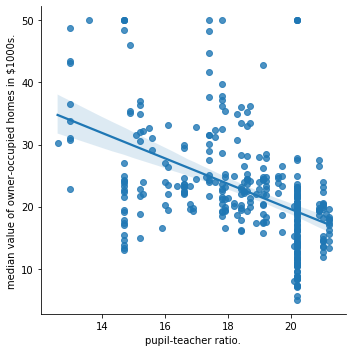

In [9]:
sns.lmplot('ptratio', 'medv', data)

plt.xlabel("pupil-teacher ratio.")
plt.ylabel("median value of owner-occupied homes in $1000s.")

In [10]:
correlation = data.corr()

correlation

,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
indus,1.000000,0.037496,0.750087,-0.440365,0.638378,-0.702327,0.569779,0.708313,0.391087,0.614155,-0.473932
chas,0.037496,1.000000,0.080275,0.112251,0.068286,-0.081834,0.007714,-0.021826,-0.125067,-0.050055,0.204390
nox,0.750087,0.080275,1.000000,-0.338515,0.736000,-0.769364,0.612180,0.670722,0.192513,0.598874,-0.413054
rm,-0.440365,0.112251,-0.338515,1.000000,-0.248573,0.269191,-0.272783,-0.356987,-0.366927,-0.615747,0.689598
age,0.638378,0.068286,0.736000,-0.248573,1.000000,-0.764208,0.447380,0.511893,0.259293,0.588834,-0.358888
dis,-0.702327,-0.081834,-0.769364,0.269191,-0.764208,1.000000,-0.477610,-0.529539,-0.231101,-0.505939,0.249422
rad,0.569779,0.007714,0.612180,-0.272783,0.447380,-0.477610,1.000000,0.903562,0.470849,0.484568,-0.352251
tax,0.708313,-0.021826,0.670722,-0.356987,0.511893,-0.529539,0.903562,1.000000,0.467437,0.544485,-0.448078
ptratio,0.391087,-0.125067,0.192513,-0.366927,0.259293,-0.231101,0.470849,0.467437,1.000000,0.374802,-0.481376
lstat,0.614155,-0.050055,0.598874,-0.615747,0.588834,-0.505939,0.484568,0.544485,0.374802,1.000000,-0.738600


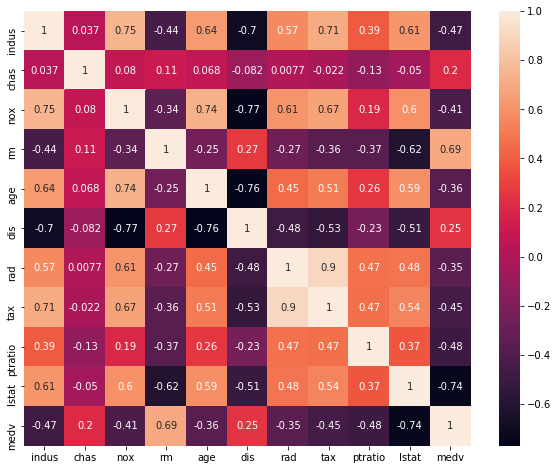

In [11]:
plt.subplots(figsize=(10, 8))
sns.heatmap(correlation, annot=True)

plt.show()

### Linear Regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Train - test spilt
taking all the features

In [13]:
X = data.drop('medv', axis=1)
Y = data['medv']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [14]:
x_train.shape, y_train.shape

((266, 10), (266,))

### Linear regression

In [16]:
linear_regression = LinearRegression()

linear_regression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
y_pred = linear_regression.predict(x_test)

y_pred

array([25.28659457, 28.57303764, 15.80275488, 12.97116825, 22.44697113,
       25.84170951, 27.20057539, 18.91085253, 26.19709511, 20.28276254,
       17.05969415, 25.26024706, 30.80682063, 37.12729863, 15.21833837,
       33.18291063, 22.39997261, 25.74162379, 25.0195504 , 23.98978558,
       19.38274011, 19.46275505, 19.28853185,  5.01746847, 15.82210828,
       22.75937428, 26.96913154, 38.0985833 , 24.05918381, 25.00816864,
       13.63516153, 34.8525424 , 35.85423056, 20.97640409, 23.95028738,
       12.39041715, 24.7975901 ,  7.0509203 , 20.81358851, 27.3221854 ,
       20.62258606, 26.08272627, 26.35831448, 20.23324227, 21.32142227,
       29.04746247, 26.02230689, 29.28581985, 22.02729511, 16.98962646,
       38.41999055, 23.37075991, 22.82358094, 17.87904935, 26.59608259,
       21.86379968, 15.70849358, 17.85231653, 30.24900233, 28.29020911,
       31.41839805, 43.12399696, 23.28794298, 17.72371626, 15.27274181,
       25.61612834, 25.90338823])

### Table for actual and predicted values

In [18]:
df_y = pd.DataFrame({'y_test' : y_test, 'y_pred' : y_pred})

df_y.sample(10)

,y_test,y_pred
ID,,
298,20.3,20.282763
161,27.0,35.854231
190,34.9,33.182911
459,14.9,17.879049
461,16.4,19.288532
429,11.0,15.802755
91,22.6,27.322185
329,19.3,22.399973
154,19.4,16.989626


### Train test score

In [19]:
print("Training score : ", linear_regression.score(x_train, y_train))

Training score :  0.7165238743004549


In [20]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)

print("Testing score : ", score)

Testing score :  0.6940069129106292


### Graph between predicted and actual values

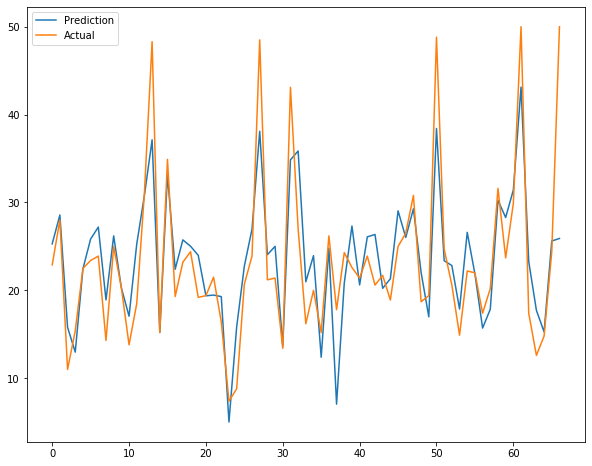

In [21]:
plt.subplots(figsize=(10,8))

plt.plot(y_pred, label="Prediction")
plt.plot(y_test.values, label="Actual")

plt.legend()

plt.show()

#### Ordinary least squares

In [22]:
import numpy as np
import statsmodels.api as sm

In [23]:
X = np.array(X)

X[:5]

array([[  2.31  ,   0.    ,   0.538 ,   6.575 ,  65.2   ,   4.09  ,
          1.    , 296.    ,  15.3   ,   4.98  ],
       [  7.07  ,   0.    ,   0.469 ,   6.421 ,  78.9   ,   4.9671,
          2.    , 242.    ,  17.8   ,   9.14  ],
       [  2.18  ,   0.    ,   0.458 ,   6.998 ,  45.8   ,   6.0622,
          3.    , 222.    ,  18.7   ,   2.94  ],
       [  2.18  ,   0.    ,   0.458 ,   7.147 ,  54.2   ,   6.0622,
          3.    , 222.    ,  18.7   ,   5.33  ],
       [  7.87  ,   0.    ,   0.524 ,   6.012 ,  66.6   ,   5.5605,
          5.    , 311.    ,  15.2   ,  12.43  ]])

In [24]:
X = sm.add_constant(X)

X[:5]

array([[  1.    ,   2.31  ,   0.    ,   0.538 ,   6.575 ,  65.2   ,
          4.09  ,   1.    , 296.    ,  15.3   ,   4.98  ],
       [  1.    ,   7.07  ,   0.    ,   0.469 ,   6.421 ,  78.9   ,
          4.9671,   2.    , 242.    ,  17.8   ,   9.14  ],
       [  1.    ,   2.18  ,   0.    ,   0.458 ,   6.998 ,  45.8   ,
          6.0622,   3.    , 222.    ,  18.7   ,   2.94  ],
       [  1.    ,   2.18  ,   0.    ,   0.458 ,   7.147 ,  54.2   ,
          6.0622,   3.    , 222.    ,  18.7   ,   5.33  ],
       [  1.    ,   7.87  ,   0.    ,   0.524 ,   6.012 ,  66.6   ,
          5.5605,   5.    , 311.    ,  15.2   ,  12.43  ]])

In [25]:
model = sm.OLS(Y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     80.83
Date:                Wed, 29 Jul 2020   Prob (F-statistic):           1.25e-81
Time:                        11:10:39   Log-Likelihood:                -1001.0
No. Observations:                 333   AIC:                             2024.
Df Residuals:                     322   BIC:                             2066.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.3742      6.156      6.558      0.000      28.262      52.486
x1             0.0311      0.076      0.411      0.682      -0.118       0.180
x2             4.1569      1.178      3.528      0.000       1.839       6.475
x3           -17.3926      4.961     -3.506      0.001     -27.153      -7.632
x4             3.8496      0.525      7.329      0.000       2.816       4.883
x5            -0.0061      0.017     -0.356      0.722      -0.040       0.028
x6            -1.2646      0.253     -4.989      0.000      -1.763      -0.766
x7             0.2584      0.079      3.257      0.001       0.102       0.415
x8            -0.0105      0.005     -2.318      0.021      -0.019      -0.002
x9            -0.9617      0.162     -5.935      0.000      -1.281      -0.643
x10           -0.6368      0.063    -10.156      0.000      -0.760      -0.513
==============================================================================
Omnibus:                      120.893   Durbin-Watson:                   1.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              459.496
Skew:                           1.557   Prob(JB):                    1.67e-100
Kurtosis:                       7.840   Cond. No.                     1.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""